In [2]:
#pip install pyathena

In [3]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np

ModuleNotFoundError: No module named 'pyathena'

In [16]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'analytics'
table_name = 'monthly_sales'

In [20]:
#Connection

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

In [6]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'analytics'
table_name = 'monthly-tx'

In [22]:
#Connection

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name} limit 10;', conn)

/opt/conda/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [23]:
df2.head()

,payer,country,date,amount
0,PROMERICA (GUA),GUATEMALA,2022-07-17,52264.36
1,BANCO DAYCOVAL,BRAZIL,2022-03-09,227509.27
2,BANCO DE CREDITO DEL PERU - BCP (UT),PERU,2021-11-19,32733.00
3,ABANK (TN),EL SALVADOR,2021-11-20,19860.00
4,WALMART (UT),MEXICO,2022-07-18,216361.78


In [8]:
df2.rename(columns={'amount':'count'}, inplace=True)

In [48]:
df = df1.merge(df2, on=['date', 'payer', 'country'], how='outer')

In [20]:
df.shape # incluyendo todos los registros de ambos lados

(103726, 5)

In [11]:
df.shape

(101970, 5)

In [12]:
df.head()

,payer,country,date,amount,count
0,UNITRANSFER,HAITI,2023-05-17,22898.51,126
1,OXXO (TN),MEXICO,2022-06-06,23505.04,342
2,BANCO DEL AUSTRO,ECUADOR,2022-06-07,105542.68,264
3,SORIANA,MEXICO,2022-06-07,112252.57,368
4,ELEKTRA (MEXICO),MEXICO,2023-05-18,6051572.33,10960


In [112]:
df2

,payer,country,date,count
0,24XORO,MEXICO,2023-05-09,66
1,BBVA - BANCOMER (BTS),MEXICO,2023-05-10,2008
2,EXPIRED ORDERS,MEXICO,2023-04-20,35
3,VIAMERICAS USA DEPOSITS,UNITED STATES,2021-06-09,29
4,ELEKTRA - MEX (BTS),MEXICO,2021-06-10,589
...,...,...,...,...
101965,ARGENPER,ARGENTINA,2021-02-10,1
101966,DIRECT DEPOSIT (BTS),MEXICO,2022-02-26,1
101967,ARGENPER,ARGENTINA,2022-01-17,1
101968,DIRECT DEPOSIT (BTS),MEXICO,2022-05-23,1


In [13]:
# Date has not datetime format
df['date'] = pd.to_datetime(df['date'])

In [49]:
df[df['amount'] == 0] # ~ 2k registros con amout == 0

,payer,country,date,amount,count
290,BANCOPPEL (BTS),MEXICO,2022-04-06,0.0,NaN
2200,ELEKTRA - MEX (BTS),MEXICO,2022-04-06,0.0,NaN
2991,INPAMEX-DEPOSIT - INSTANT PAY DE MEXICO,MEXICO,2022-12-09,0.0,NaN
3251,TELECOMM TELEGRAFOS (BTS),MEXICO,2022-04-06,0.0,NaN
4174,CAMBIOS PERSEO,ARGENTINA,2021-12-26,0.0,NaN
...,...,...,...,...,...
102417,BANCO DE CREDITO PERU,PERU,2022-09-07,0.0,NaN
102434,BANCO DE CREDITO PERU,PERU,2022-07-28,0.0,NaN
102439,DIRECT DEPOSIT (BTS),MEXICO,2021-08-27,0.0,NaN
102443,TELEDOLAR-NIC,NICARAGUA,2023-10-04,0.0,NaN


In [22]:
df = df[df['amount'] != 0]

In [50]:
df[(df['amount'] == 0) & (df['count'] != 0)]

,payer,country,date,amount,count
290,BANCOPPEL (BTS),MEXICO,2022-04-06,0.0,NaN
2200,ELEKTRA - MEX (BTS),MEXICO,2022-04-06,0.0,NaN
2991,INPAMEX-DEPOSIT - INSTANT PAY DE MEXICO,MEXICO,2022-12-09,0.0,NaN
3251,TELECOMM TELEGRAFOS (BTS),MEXICO,2022-04-06,0.0,NaN
4174,CAMBIOS PERSEO,ARGENTINA,2021-12-26,0.0,NaN
...,...,...,...,...,...
102417,BANCO DE CREDITO PERU,PERU,2022-09-07,0.0,NaN
102434,BANCO DE CREDITO PERU,PERU,2022-07-28,0.0,NaN
102439,DIRECT DEPOSIT (BTS),MEXICO,2021-08-27,0.0,NaN
102443,TELEDOLAR-NIC,NICARAGUA,2023-10-04,0.0,NaN


In [54]:

df[(df['amount'] == 0) & (~df['count'].isnull())]

,payer,country,date,amount,count
4335,KORI,BURKINA FASO,2023-01-27,0.0,2.0
4420,TRANSPAY,CAMEROON,2023-04-27,0.0,2.0
5921,BANCO POPULAR HONDURAS (UT),HONDURAS,2022-08-24,0.0,2.0
8442,MERCHANTRADE,BANGLADESH,2023-03-24,0.0,2.0
8476,NAFA,TOGO,2023-01-17,0.0,4.0
...,...,...,...,...,...
101018,MASTERCARD ATM NETWORK,UNITED STATES (ATM & DEPOSITS),2023-02-11,0.0,2.0
101956,MERCHANTRADE,VIETNAM,2021-06-08,0.0,2.0
102024,YES BANK,INDIA,2021-11-27,0.0,2.0
102400,KORI,MALI,2023-03-05,0.0,2.0


In [23]:
df[df['payer'].str.contains('EXPIRED')]['payer'].unique() # Todos se llaman igual

array(['EXPIRED ORDERS'], dtype=object)

In [24]:
# Detecto aquellos registros de payer donde se incluye 'EXPIRED'
df[df['payer'].str.contains('EXPIRED')] #Son casi 5800 registros de payer == 'EXPIRED ORDERS'

,payer,country,date,amount,count
96,EXPIRED ORDERS,MEXICO,2023-03-21,-9070.00,17.0
222,EXPIRED ORDERS,HONDURAS,2022-06-01,-526.00,2.0
406,EXPIRED ORDERS,PHILIPPINES,2021-04-19,-718.00,7.0
470,EXPIRED ORDERS,EL SALVADOR,2022-04-04,-3125.00,4.0
666,EXPIRED ORDERS,HONDURAS,2022-06-09,-949.00,3.0
...,...,...,...,...,...
103357,EXPIRED ORDERS,MEXICO,2021-01-15,-7665.00,8.0
103434,EXPIRED ORDERS,MEXICO,2021-01-28,-3078.00,8.0
103527,EXPIRED ORDERS,COLOMBIA,2022-05-13,-2150.58,6.0
103570,EXPIRED ORDERS,COLOMBIA,2022-02-18,-145.14,1.0


In [25]:
# Deleting 'EXPIRED ORDERS' in payer column
df = df[df['payer'] != 'EXPIRED ORDERS']

In [26]:
df['payer_country'] = df['payer'] + '_' + df['country'] # Combinaciones payer + country
df['payer_country'].value_counts()

ELEKTRA (BTS)_HONDURAS            1025
BANORTE (UT)_MEXICO               1025
BANCO ATLANTIDA_HONDURAS          1025
ELEKTRA (MEXICO)_MEXICO           1025
BANRURAL (RYT)_GUATEMALA          1025
                                  ... 
TRANSFERTO - THUNES_POLAND           1
PING EXPRESS_MALI                    1
TRANSFERTO - THUNES_ZIMBABWE         1
TERRAPAY_FRANCE                      1
RED CHAPINA ANYWHERE_GUATEMALA       1
Name: payer_country, Length: 260, dtype: int64

In [27]:
len(df['payer_country'].unique())

260

In [32]:
monthly_tx = df[['date','payer_country','amount', 'count']]

In [30]:
from sklearn.cluster import KMeans

# Inicializar el modelo de KMeans
num_clusters = 20  # Ajustar
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [33]:
monthly_tx.head()

,date,payer_country,amount,count
0,2023-05-17,UNITRANSFER_HAITI,22898.51,126.0
1,2022-06-06,OXXO (TN)_MEXICO,23505.04,342.0
2,2022-06-07,BANCO DEL AUSTRO_ECUADOR,105542.68,264.0
3,2022-06-07,SORIANA_MEXICO,112252.57,368.0
4,2023-05-18,ELEKTRA (MEXICO)_MEXICO,6051572.33,10960.0


In [55]:
data_for_clustering = monthly_tx[['amount', 'count']]

In [56]:
# Inicializar el modelo de KMeans
num_clusters = 20  # Ajustar
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [57]:
kmeans.fit(data_for_clustering) #Entreno

KMeans(n_clusters=20, random_state=42)

In [58]:
monthly_tx['cluster'] = kmeans.labels_ # Pongo etiquetas

In [61]:
#Voy a analizar los clusters para ver si realmente tienen caracteristicas similares
cluster_stats = monthly_tx.groupby('cluster').agg({
    'count': ['mean', 'std', 'min', 'max'],  # Cantidad de operaciones x dia
    'amount': ['mean', 'std', 'min', 'max']     # Total de $ x dia
})

cluster_stats

count                                       amount  \
                 mean          std      min      max          mean   
cluster                                                              
0           42.859265    63.128899      1.0   1688.0  1.300882e+04   
1        13444.093333  1409.215925  10432.0  18910.0  6.273675e+06   
2         3703.240575   581.386995   2656.0   6536.0  1.795156e+06   
3        20494.253521  1699.671100  15833.0  24624.0  9.501230e+06   
4         1139.271886   449.416699    377.0   3538.0  5.371314e+05   
5        11957.188889  1276.849692   9052.0  18312.0  5.489865e+06   
6        10289.266871  1109.412562   7608.0  16044.0  4.742305e+06   
7         7107.532290   871.172680   5426.0  11488.0  3.322264e+06   
8          598.771016   235.637114    116.0   1670.0  2.177390e+05   
9         1642.809353   505.515486    548.0   3708.0  7.911113e+05   
10       17832.476190  1886.808040  13513.0  24013.0  8.313539e+06   
11        2663.289683   565.598899   1260.0   5378.0  1.269814e+06   
12        8606.503529   999.734894   6373.0  11776.0  3.990114e+06   
13       26049.705882  1677.025185  23175.0  28949.0  1.253431e+07   
14        4838.019011   716.896316   3317.0   8648.0  2.262925e+06   
15         863.715214   332.401413    252.0   2479.0  3.625412e+05   
16       15416.937931  1469.791421  12138.0  19800.0  7.191085e+06   
17         261.019921   141.474678     19.0   1000.0  9.135233e+04   
18       23177.930556  1616.427676  19977.0  29988.0  1.083994e+07   
19        5824.370115   788.941713   4243.0   9081.0  2.762169e+06   

                                                   
                   std          min           max  
cluster                                            
0         14889.740093   -448586.33  5.208852e+04  
1        237009.208893   5882006.84  6.724087e+06  
2        137799.898656   1536153.23  2.031322e+06  
3        326197.013625   8921083.92  1.016137e+07  
4         59219.879320    449601.61  6.642602e+05  
5        211669.271462   5117834.76  5.877023e+06  
6        214454.105653   4369655.05  5.107656e+06  
7        176942.061129   3046925.36  3.655678e+06  
8         39681.978847    154313.32  2.897442e+05  
9         95688.527781    664329.39  1.031059e+06  
10       315359.978796   7766352.84  8.906049e+06  
11       149945.328973   1031810.41  1.532628e+06  
12       207402.881259   3658115.81  4.358885e+06  
13       625087.146954  11801845.14  1.398802e+07  
14       141110.872499   2032435.97  2.514835e+06  
15        45119.041286    289839.73  4.495883e+05  
16       292507.623067   6739252.17  7.751644e+06  
17        28994.319011     52093.88  1.542826e+05  
18       419304.790137  10210666.99  1.167145e+07  
19       152721.824241   2515265.73  3.042588e+06

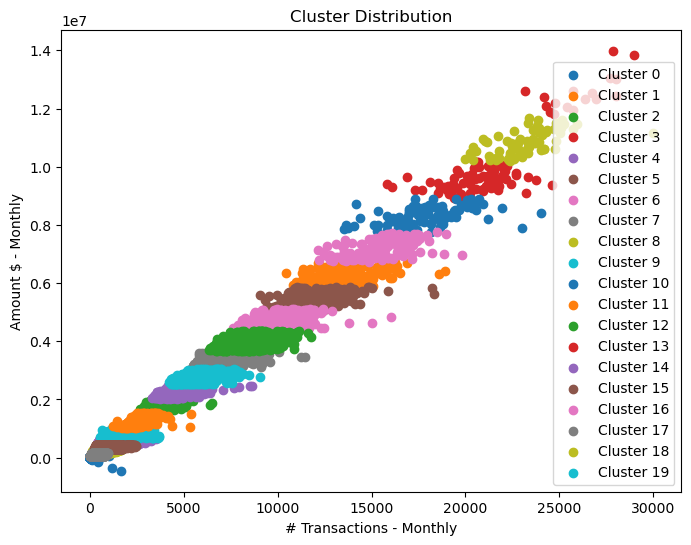

In [62]:
import matplotlib.pyplot as plt

# Scatter plot by cluster
plt.figure(figsize=(8, 6))  # Set the figure size for the plot

# Iterate through each unique cluster label in the 'daily_transactions' dataset
for cluster_label in sorted(monthly_tx['cluster'].unique()):
    # Filter data for the current cluster label
    cluster_data = monthly_tx[monthly_tx['cluster'] == cluster_label]
    
    # Create a scatter plot for the current cluster
    plt.scatter(cluster_data['count'], cluster_data['amount'], label=f'Cluster {cluster_label}')

# Set labels for the X and Y axes
plt.xlabel('# Transactions - Monthly')
plt.ylabel('Amount $ - Monthly')

# Set the title for the plot
plt.title('Cluster Distribution')

# Display the legend based on cluster labels
plt.legend()

# Show the plot
plt.show()

In [67]:
# Elbow method > To reduce # clusters
from sklearn.cluster import KMeans

# Calculate inertia for different numbers of clusters
# inertias = []
# num_clusters_range = range(1, 11)  # Range of number of clusters to try

# for k in num_clusters_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data_for_clustering)
#     inertias.append(kmeans.inertia_)

# Visualize the Elbow Method
# plt.figure(figsize=(8, 5))
# plt.plot(num_clusters_range, inertias, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.show()

In [91]:
# Inicializar el modelo de KMeans
num_clusters = 6  # Ajustar
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [92]:
kmeans.fit(data_for_clustering) #Training

KMeans(n_clusters=6, random_state=42)

In [93]:
monthly_tx['cluster'] = kmeans.labels_ # Pongo etiquetas

In [94]:
#Voy a analizar los clusters para ver si realmente tienen caracteristicas similares
cluster_stats = monthly_tx.groupby('cluster').agg({
    'count': ['mean', 'std', 'min', 'max'],  # Cantidad de operaciones x dia
    'amount': ['mean', 'std', 'min', 'max']     # Total de $ x dia
})

cluster_stats

count                                       amount  \
                 mean          std      min      max          mean   
cluster                                                              
0          123.700910   179.693673      1.0   1688.0  4.206961e+04   
1         8106.909164  1522.110107   5165.0  16044.0  3.767430e+06   
2         4369.846063  1146.968023   2111.0   9081.0  2.073957e+06   
3        20615.853282  3106.282701  13513.0  29988.0  9.630562e+06   
4        12963.426846  2016.091736   8760.0  19800.0  6.010796e+06   
5         1006.691569   488.091381    159.0   5324.0  4.450918e+05   

                                                
                  std         min          max  
cluster                                         
0        5.682760e+04  -448586.33    243564.97  
1        5.533411e+05  2922784.07   4890372.40  
2        4.535165e+05  1263327.18   2922532.31  
3        1.318037e+06  7845002.32  13988018.84  
4        7.767252e+05  4895894.04   7815795.62  
5        1.804344e+05   243595.00   1254142.42

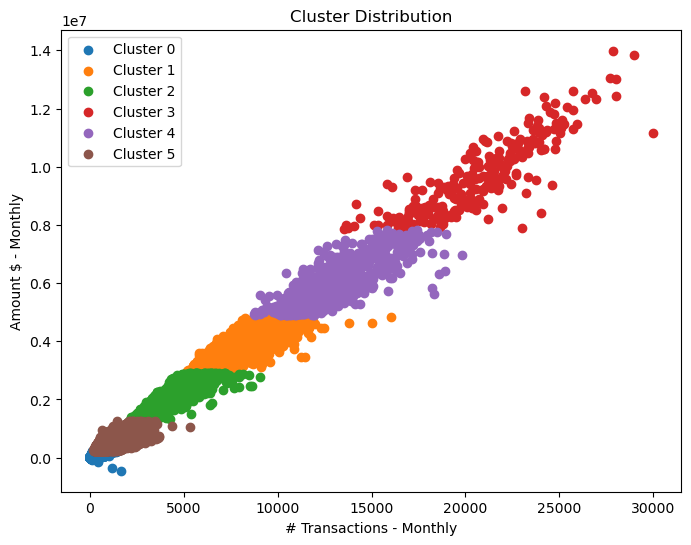

In [95]:
# Scatter plot by cluster
plt.figure(figsize=(8, 6))  # Set the figure size for the plot

# Iterate through each unique cluster label in the 'daily_transactions' dataset
for cluster_label in sorted(monthly_tx['cluster'].unique()):
    # Filter data for the current cluster label
    cluster_data = monthly_tx[monthly_tx['cluster'] == cluster_label]
    
    # Create a scatter plot for the current cluster
    plt.scatter(cluster_data['count'], cluster_data['amount'], label=f'Cluster {cluster_label}')

# Set labels for the X and Y axes
plt.xlabel('# Transactions - Monthly')
plt.ylabel('Amount $ - Monthly')

# Set the title for the plot
plt.title('Cluster Distribution')

# Display the legend based on cluster labels
plt.legend()

# Show the plot
plt.show()

In [96]:
monthly_tx.groupby('cluster')['payer_country'].nunique().reset_index()

,cluster,payer_country
0,0,258
1,1,5
2,2,7
3,3,2
4,4,4
5,5,35


In [97]:
monthly_tx[monthly_tx['cluster'] == 5]['payer_country'].unique() # Listado de cluster 5

array(['BANCO ATLANTIDA_HONDURAS', 'BANORTE (UT)_MEXICO',
       'ELEKTRA (BTS)_HONDURAS',
       'CUSCA (CITI - RECIBA NETWORKS)_EL SALVADOR',
       'TELECOMM TELEGRAFOS (APPRIZA)_MEXICO', 'BANCO RENDIMENTO_BRAZIL',
       'MSBB MONEY_BRAZIL', 'FEDECREDITO (RYT)_EL SALVADOR',
       'METROBANK_PHILIPPINES', 'BANCO AGRICOLA_EL SALVADOR',
       'INTERMEX_MEXICO', 'BANRURAL (RYT)_GUATEMALA',
       'ENVIOS CON CLABE (APPRIZA)_MEXICO',
       'BANCO DE ORO (BDO)_PHILIPPINES',
       'CARIBE EXPRESS_DOMINICAN REPUBLIC',
       'BBVA - BANCOMER (BTS)_MEXICO', 'WALMART (UT)_MEXICO',
       'G Y T CONTINENTAL_GUATEMALA',
       'BANSEFI - BANCO DEL BIENESTAR_MEXICO',
       'BANCO DE OCCIDENTE_HONDURAS', 'BANCO DAYCOVAL_BRAZIL',
       'BANCO INDUSTRIAL_GUATEMALA', 'BANCOLOMBIA_COLOMBIA',
       'BANPRO_NICARAGUA', 'BANRURAL (HONDURAS)_HONDURAS',
       'TELECOMM TELEGRAFOS (BTS)_MEXICO', 'ELEKTRA - MEX (BTS)_MEXICO',
       'DAVIVIENDA_COLOMBIA', 'SORIANA_MEXICO',
       'MICOOPE-FENACOAC 

In [98]:
monthly_tx[monthly_tx['cluster'] == 4]['payer_country'].unique() # Listado de cluster 4

array(['ELEKTRA (MEXICO)_MEXICO', 'BANRURAL (RYT)_GUATEMALA',
       'BANCOPPEL (APPRIZA)_MEXICO', 'BANCO INDUSTRIAL_GUATEMALA'],
      dtype=object)

In [99]:
monthly_tx[monthly_tx['cluster'] == 3]['payer_country'].unique() # Listado de cluster 3

array(['ELEKTRA (MEXICO)_MEXICO', 'BANCOPPEL (APPRIZA)_MEXICO'],
      dtype=object)

In [100]:
monthly_tx[monthly_tx['cluster'] == 2]['payer_country'].unique() # Listado de cluster 2

array(['BANCOPPEL (APPRIZA)_MEXICO', 'BANCO INDUSTRIAL_GUATEMALA',
       'BANRURAL (RYT)_GUATEMALA', 'BANCOPPEL (BTS)_MEXICO',
       'ENVIOS CON CLABE (APPRIZA)_MEXICO', 'ELEKTRA (MEXICO)_MEXICO',
       'BBVA - BANCOMER (BTS)_MEXICO'], dtype=object)

In [101]:
monthly_tx[monthly_tx['cluster'] == 1]['payer_country'].unique() # Listado de cluster 1

array(['BANCOPPEL (APPRIZA)_MEXICO', 'BANRURAL (RYT)_GUATEMALA',
       'BANCO INDUSTRIAL_GUATEMALA', 'ELEKTRA (MEXICO)_MEXICO',
       'BANCOPPEL (BTS)_MEXICO'], dtype=object)

In [102]:
monthly_tx[monthly_tx['cluster'] == 0]['payer_country'].unique() # Listado de cluster 0

array(['UNITRANSFER_HAITI', 'OXXO (TN)_MEXICO',
       'BANCO DEL AUSTRO_ECUADOR', 'SORIANA_MEXICO', 'FICOHSA_HONDURAS',
       'LAFISE_NICARAGUA', 'BANCO BISA_BOLIVIA',
       'FEDECACES (EL SALVADOR)_EL SALVADOR',
       'CAJA POPULAR MEXICANA (UT)_MEXICO', 'BANCOLOMBIA_COLOMBIA',
       'CREDOMATIC_EL SALVADOR', 'CHEDRAUI (APPRIZA)_MEXICO',
       'GRUPO EXITO (TN)_COLOMBIA', 'COOPERATIVA CACIL (UT)_HONDURAS',
       'ECUAGIROS_ECUADOR', 'ABANK (TN)_EL SALVADOR',
       'CUSCA (CITI - RECIBA NETWORKS)_EL SALVADOR',
       'BANCO RENDIMENTO_BRAZIL',
       'BAM - BANCO AGROMERCANTIL (UT)_GUATEMALA',
       'FARMACIAS GUADALAJARA (UT)_MEXICO',
       'BANCO PICHINCHA (TN)_ECUADOR', 'EASY PAGOS_ECUADOR',
       'WALMART (UT)_MEXICO', 'TELEDOLAR_COSTA RICA',
       'INPAMEX-DEPOSIT - INSTANT PAY DE MEXICO_MEXICO',
       'MICOOPE-FENACOAC (RED CHAPINA)_GUATEMALA', 'AIRPAK_MEXICO',
       'ELEKTRA (BTS)_GUATEMALA', 'DAVIVIENDA_COLOMBIA',
       'TRANSFER DIRECTO_MEXICO', 'BANCO DE GUAYAQ

In [103]:
monthly_tx[monthly_tx['cluster'] == 5].describe()

,amount,count,cluster
count,1.509900e+04,15099.000000,15099.0
mean,4.450918e+05,1006.691569,5.0
std,1.804344e+05,488.091381,0.0
min,2.435950e+05,159.000000,5.0
25%,3.142170e+05,669.000000,5.0
50%,3.951174e+05,908.000000,5.0
75%,5.241691e+05,1201.000000,5.0
max,1.254142e+06,5324.000000,5.0


In [104]:
monthly_tx[monthly_tx['cluster'] == 4].describe()

,amount,count,cluster
count,7.450000e+02,745.000000,745.0
mean,6.010796e+06,12963.426846,4.0
std,7.767252e+05,2016.091736,0.0
min,4.895894e+06,8760.000000,4.0
25%,5.375931e+06,11407.000000,4.0
50%,5.897350e+06,12697.000000,4.0
75%,6.564994e+06,14361.000000,4.0
max,7.815796e+06,19800.000000,4.0


In [105]:
monthly_tx[monthly_tx['cluster'] == 3].describe()

,amount,count,cluster
count,2.590000e+02,259.000000,259.0
mean,9.630562e+06,20615.853282,3.0
std,1.318037e+06,3106.282701,0.0
min,7.845002e+06,13513.000000,3.0
25%,8.518277e+06,18264.000000,3.0
50%,9.397748e+06,20546.000000,3.0
75%,1.060774e+07,22789.500000,3.0
max,1.398802e+07,29988.000000,3.0


In [106]:
monthly_tx[monthly_tx['cluster'] == 2].describe()

,amount,count,cluster
count,1.689000e+03,1689.000000,1689.0
mean,2.073957e+06,4369.846063,2.0
std,4.535165e+05,1146.968023,0.0
min,1.263327e+06,2111.000000,2.0
25%,1.700231e+06,3453.000000,2.0
50%,2.061970e+06,4299.000000,2.0
75%,2.448168e+06,5210.000000,2.0
max,2.922532e+06,9081.000000,2.0


In [107]:
monthly_tx[monthly_tx['cluster'] == 1].describe()

,amount,count,cluster
count,1.244000e+03,1244.000000,1244.0
mean,3.767430e+06,8106.909164,1.0
std,5.533411e+05,1522.110107,0.0
min,2.922784e+06,5165.000000,1.0
25%,3.275669e+06,6876.750000,1.0
50%,3.700681e+06,7920.500000,1.0
75%,4.203201e+06,9155.250000,1.0
max,4.890372e+06,16044.000000,1.0


In [108]:
monthly_tx[monthly_tx['cluster'] == 0].describe()

,amount,count,cluster
count,76910.000000,76910.000000,76910.0
mean,42069.611110,123.700910,0.0
std,56827.603918,179.693673,0.0
min,-448586.330000,1.000000,0.0
25%,2500.000000,7.000000,0.0
50%,16857.125000,46.000000,0.0
75%,57568.405000,159.000000,0.0
max,243564.970000,1688.000000,0.0


In [109]:
#Voy a ver si ELECTRA cae en varios clusters a lo largo del tiempo
monthly_tx[monthly_tx['payer_country'] == 'ELEKTRA (MEXICO)_MEXICO']['cluster'].value_counts()

4    444
1    291
3    251
2     36
5      3
Name: cluster, dtype: int64

In [110]:
#Distribucion de todo lo que tiene Mexico
monthly_tx[monthly_tx['payer_country'].str.contains('MEXICO')]['cluster'].value_counts()

0    13821
5     5720
1      734
4      631
2      473
3      259
Name: cluster, dtype: int64